## **Task 01**



### **task1.2: Install spark and pyspark**

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=58c40f4d80035d258ca09e4235d3611be2f33a1f2a11390277dd99c11576e365
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


* NOTE - We do not need to install Spark and PySpark at same time because PySpark is essentially Spark for Python. PySpark is a Python library that provides a Python API for Apache Spark, a powerful distributed computing framework. It allow to leverage the capabilities of Spark using Python, making it unnecessary to install Spark separately if you plan to work with Spark in a Python environment.*

In [2]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("GSSalesAnalysis").getOrCreate()

### **task 1.3 : Load the data into Spark Dataframe**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* For load data we need to seperate GS Sales Data seperate from Exel file


In [4]:
# Import pandas package
import pandas as pd

# Define the file path
data_path = '/content/drive/MyDrive/SURGE GLOBAL/GS_Sales_Data.csv'

# Read csv data into a Pandas DataFrame
data_pd = pd.read_csv(data_path)

# Convert Pandas DataFrame to Spark DataFrame
GS_Sales_Data = spark.createDataFrame(data_pd)

# Show the first few rows of the DataFrame
GS_Sales_Data.show()

+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|   Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Returned|
+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|     1|US-2019-103800|  1/3/2019|    2019-1| 1/7/2019|   201

*  additionla information - if we want to load the exel file directly we need  install openpyxl library*

*  CODE-
    !pip install openpyxl

    Define the file path

    data_path = 'xlsx'

### **task 1.4: Verify the data schema, casting fields to the correct data types  and printing the final schema**

In [6]:
# Verify Data Schema
GS_Sales_Data.printSchema()

root
 |-- Row ID: long (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Order_Week: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship_Week: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State/Province: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regional Manager: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)
 |-- 

*  **Casting-**

*   **For Row ID :**
"Long" is typically a data type used to represent integers with a larger range of values compared to regular integers. Therefore, for our GS Sales Data, which primarily involves smaller numbers, using the "integer" data type can be more memory-efficient and may result in better performance.

*   **For Sales, Discount, Profit :**
using "double" data type offers larger range and higher precision, "float" data type offers small range but memory efficiency. For industrial-scale data processing, accuracy is more important than memory efficiency, so the "double" data type is suitable. But for our GS Sales Data  like smaller scale using "float" data type can be more memory-efficient and result in better performance.

*   **For Quantity :**
"Long" is used to represent integers with a larger range of values compared to regular integers. Therefore, for Quantity, which primarily involves numbers. so, using the "integer" data type can be more memory-efficient and may result in better performance.

**Cast the "Order Date" and "Ship Date" columns to date data types in PySpark**

In [8]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

# Assuming 'fact_GS_Sales_Data' is your GS_Sales_DataFrame
GS_Sales_Data = GS_Sales_Data.withColumn("Row ID", col("Row ID").cast(IntegerType()))
GS_Sales_Data = GS_Sales_Data.withColumn("Sales", col("Sales").cast(FloatType()))
GS_Sales_Data = GS_Sales_Data.withColumn("Quantity", col("Quantity").cast(IntegerType()))
GS_Sales_Data = GS_Sales_Data.withColumn("Discount", col("Discount").cast(FloatType()))
GS_Sales_Data = GS_Sales_Data.withColumn("Profit", col("Profit").cast(FloatType()))

In [9]:
#Print Final Schema
GS_Sales_Data.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Order_Week: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship_Week: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State/Province: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regional Manager: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Profit: float (nullable = true)
 |

In [10]:
## Number of rows in Dataframe
GS_Sales_Data.count()

10194

### **task 1.5: Create the fact and dimension tables as dataframes proposed in 1.1 by querying the dataframes in 1.3 and implementing appropriate keys, printing their schemas and the top 20 records each**

**Fact tables ** *italicized text*

In [11]:
# Define the fact_data DataFrame
fact_data = GS_Sales_Data.select("Row ID", "Order ID", "Order Date", "Ship Date", "Customer ID",
                        "Product ID", "Sales", "Quantity", "Discount", "Profit", "Returned")

# Print the schema
fact_data.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Profit: float (nullable = true)
 |-- Returned: string (nullable = true)



In [12]:
# Show the top 20 records
fact_data.show(20)

+------+--------------+----------+---------+-----------+---------------+-------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date|Ship Date|Customer ID|     Product ID|  Sales|Quantity|Discount|  Profit|Returned|
+------+--------------+----------+---------+-----------+---------------+-------+--------+--------+--------+--------+
|     1|US-2019-103800|  1/3/2019| 1/7/2019|   DP-13000|OFF-PA-10000174| 16.448|       2|     0.2|  5.5512|     NaN|
|     2|US-2019-112326|  1/4/2019| 1/8/2019|   PO-19195|OFF-BI-10004094|   3.54|       2|     0.8|  -5.487|     NaN|
|     3|US-2019-112326|  1/4/2019| 1/8/2019|   PO-19195|OFF-LA-10003223| 11.784|       3|     0.2|  4.2717|     NaN|
|     4|US-2019-112326|  1/4/2019| 1/8/2019|   PO-19195|OFF-ST-10002743|272.736|       3|     0.2|-64.7748|     NaN|
|     5|US-2019-141817|  1/5/2019|1/12/2019|   MB-18085|OFF-AR-10003478| 19.536|       3|     0.2|   4.884|     NaN|
|     6|US-2019-167199|  1/6/2019|1/10/2019|   ME-17320|FUR-CH-1

**Dimension Table**

**Customer Dimension Table**

In [13]:
# Create Customer Dimension
customer_dim = GS_Sales_Data.select("Customer ID", "Customer Name", "Segment", "Country/Region", "City",
                           "State/Province", "Postal Code", "Region", "Regional Manager").distinct()

customer_dim.printSchema()


root
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State/Province: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regional Manager: string (nullable = true)



In [14]:
# Remove duplicates
customer_dim = customer_dim.dropDuplicates(["Customer ID"])
customer_dim.count()

804

In [15]:
# Display distinct values in the Customer Dimension
customer_dim.distinct().show(20)

+-----------+--------------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+
|Customer ID|       Customer Name|    Segment|Country/Region|         City|State/Province|Postal Code| Region| Regional Manager|
+-----------+--------------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+
|   AA-10315|          Alex Avila|   Consumer| United States|San Francisco|    California|      94122|   West|  Sadie Pawthorne|
|   AA-10375|        Allen Armold|   Consumer| United States|  Los Angeles|    California|      90008|   West|  Sadie Pawthorne|
|   AA-10480|        Andrew Allen|   Consumer| United States|   Middletown|   Connecticut|      06457|   East|      Chuck Magee|
|   AA-10645|       Anna Andreadi|   Consumer| United States|      Chester|  Pennsylvania|      19013|   East|      Chuck Magee|
|   AB-10015|       Aaron Bergman|   Consumer| United States|    Arlington|         Texas|      7

In [16]:
# adding surrogate key
from pyspark.sql.functions import monotonically_increasing_id

customer_dim = customer_dim.withColumn("Customer Key", monotonically_increasing_id() + 1)
customer_dim.show(20)

+-----------+--------------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+------------+
|Customer ID|       Customer Name|    Segment|Country/Region|         City|State/Province|Postal Code| Region| Regional Manager|Customer Key|
+-----------+--------------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+------------+
|   AA-10315|          Alex Avila|   Consumer| United States|San Francisco|    California|      94122|   West|  Sadie Pawthorne|           1|
|   AA-10375|        Allen Armold|   Consumer| United States|  Los Angeles|    California|      90008|   West|  Sadie Pawthorne|           2|
|   AA-10480|        Andrew Allen|   Consumer| United States|   Middletown|   Connecticut|      06457|   East|      Chuck Magee|           3|
|   AA-10645|       Anna Andreadi|   Consumer| United States|      Chester|  Pennsylvania|      19013|   East|      Chuck Magee|           4|
|   AB

In [17]:
## Rearrange the customer Dimension Table
customer_dim = customer_dim.select("Customer Key", "Customer ID", "Customer Name", "Segment",
                           "Country/Region", "City", "State/Province", "Postal Code", "Region", "Regional Manager").distinct()

customer_dim.printSchema()
customer_dim.show(20)

root
 |-- Customer Key: long (nullable = false)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State/Province: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regional Manager: string (nullable = true)

+------------+-----------+--------------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+
|Customer Key|Customer ID|       Customer Name|    Segment|Country/Region|         City|State/Province|Postal Code| Region| Regional Manager|
+------------+-----------+--------------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+
|           1|   AA-10315|          Alex Avila|   Consumer| United States|San Francisco|    California|      94122|   West|  Sadie Pawthorne|

**Product Dimension Table**

In [25]:
# Create Product Dimension
product_dim = GS_Sales_Data.select("Product ID", "Category", "Sub-Category", "Product Name").distinct()

product_dim.printSchema()

root
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)



In [26]:
# remove duplicates
product_dim = product_dim.dropDuplicates(["Product ID"])
product_dim.count()

1862

In [27]:
# Display distinct values in the Product Dimension
product_dim.distinct().show(20)

+---------------+---------+------------+--------------------+
|     Product ID| Category|Sub-Category|        Product Name|
+---------------+---------+------------+--------------------+
|FUR-BO-10000112|Furniture|   Bookcases|Bush Birmingham C...|
|FUR-BO-10000330|Furniture|   Bookcases|Sauder Camden Cou...|
|FUR-BO-10000362|Furniture|   Bookcases|Sauder Inglewood ...|
|FUR-BO-10000468|Furniture|   Bookcases|O'Sullivan 2-Shel...|
|FUR-BO-10000711|Furniture|   Bookcases|Hon Metal Bookcas...|
|FUR-BO-10000780|Furniture|   Bookcases|O'Sullivan Planta...|
|FUR-BO-10001337|Furniture|   Bookcases|O'Sullivan Living...|
|FUR-BO-10001519|Furniture|   Bookcases|O'Sullivan 3-Shel...|
|FUR-BO-10001567|Furniture|   Bookcases|Bush Westfield Co...|
|FUR-BO-10001601|Furniture|   Bookcases|Sauder Mission Li...|
|FUR-BO-10001608|Furniture|   Bookcases|Hon Metal Bookcas...|
|FUR-BO-10001619|Furniture|   Bookcases|O'Sullivan Cherry...|
|FUR-BO-10001798|Furniture|   Bookcases|Bush Somerset Col...|
|FUR-BO-

In [28]:
# adding surrogate key
from pyspark.sql.functions import monotonically_increasing_id

product_dim = product_dim.withColumn("Product Key", monotonically_increasing_id() + 1)
product_dim.show(20)

+---------------+---------+------------+--------------------+-----------+
|     Product ID| Category|Sub-Category|        Product Name|Product Key|
+---------------+---------+------------+--------------------+-----------+
|FUR-BO-10000112|Furniture|   Bookcases|Bush Birmingham C...|          1|
|FUR-BO-10000330|Furniture|   Bookcases|Sauder Camden Cou...|          2|
|FUR-BO-10000362|Furniture|   Bookcases|Sauder Inglewood ...|          3|
|FUR-BO-10000468|Furniture|   Bookcases|O'Sullivan 2-Shel...|          4|
|FUR-BO-10000711|Furniture|   Bookcases|Hon Metal Bookcas...|          5|
|FUR-BO-10000780|Furniture|   Bookcases|O'Sullivan Planta...|          6|
|FUR-BO-10001337|Furniture|   Bookcases|O'Sullivan Living...|          7|
|FUR-BO-10001519|Furniture|   Bookcases|O'Sullivan 3-Shel...|          8|
|FUR-BO-10001567|Furniture|   Bookcases|Bush Westfield Co...|          9|
|FUR-BO-10001601|Furniture|   Bookcases|Sauder Mission Li...|         10|
|FUR-BO-10001608|Furniture|   Bookcase

In [29]:
## Rearrange the Product Dimension Table
product_dim = product_dim.select("Product Key", "Product ID", "Category", "Sub-Category", "Product Name").distinct()
product_dim.show(20)

+-----------+---------------+---------+------------+--------------------+
|Product Key|     Product ID| Category|Sub-Category|        Product Name|
+-----------+---------------+---------+------------+--------------------+
|          1|FUR-BO-10000112|Furniture|   Bookcases|Bush Birmingham C...|
|          2|FUR-BO-10000330|Furniture|   Bookcases|Sauder Camden Cou...|
|          3|FUR-BO-10000362|Furniture|   Bookcases|Sauder Inglewood ...|
|          4|FUR-BO-10000468|Furniture|   Bookcases|O'Sullivan 2-Shel...|
|          5|FUR-BO-10000711|Furniture|   Bookcases|Hon Metal Bookcas...|
|          6|FUR-BO-10000780|Furniture|   Bookcases|O'Sullivan Planta...|
|          7|FUR-BO-10001337|Furniture|   Bookcases|O'Sullivan Living...|
|          8|FUR-BO-10001519|Furniture|   Bookcases|O'Sullivan 3-Shel...|
|          9|FUR-BO-10001567|Furniture|   Bookcases|Bush Westfield Co...|
|         10|FUR-BO-10001601|Furniture|   Bookcases|Sauder Mission Li...|
|         11|FUR-BO-10001608|Furniture

**Calendar Dimension Table**

In [30]:
# Create Calendar Dimension
Calendar_dim = GS_Sales_Data.select("Order Date", "Order_Week", "Ship Date", "Ship_Week").distinct()

Calendar_dim.printSchema()

root
 |-- Order Date: string (nullable = true)
 |-- Order_Week: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship_Week: string (nullable = true)



In [31]:
# Display distinct values in the Calendar Dimension
Calendar_dim.distinct().show(20)

+----------+----------+----------+---------+
|Order Date|Order_Week| Ship Date|Ship_Week|
+----------+----------+----------+---------+
|  6/1/2019|   2019-22|  6/6/2019|  2019-23|
| 7/14/2019|   2019-29| 7/21/2019|  2019-30|
|11/19/2019|   2019-47|11/25/2019|  2019-48|
|  3/9/2020|   2020-11| 3/12/2020|  2020-11|
|10/24/2020|   2020-43|10/30/2020|  2020-44|
|10/30/2020|   2020-44| 11/2/2020|  2020-45|
| 12/5/2020|   2020-49| 12/8/2020|  2020-50|
| 1/10/2021|    2021-3| 1/13/2021|   2021-3|
| 3/11/2021|   2021-11| 3/13/2021|  2021-11|
|  5/2/2021|   2021-19|  5/8/2021|  2021-19|
|  5/3/2021|   2021-19|  5/5/2021|  2021-19|
|  8/4/2019|   2019-32|  8/8/2019|  2019-32|
| 11/4/2019|   2019-45| 11/8/2019|  2019-45|
|11/21/2019|   2019-47|11/26/2019|  2019-48|
| 2/10/2020|    2020-7| 2/14/2020|   2020-7|
| 5/26/2020|   2020-22| 5/28/2020|  2020-22|
| 1/30/2021|    2021-5|  2/1/2021|   2021-6|
| 2/14/2019|    2019-7| 2/19/2019|   2019-8|
| 5/18/2019|   2019-20| 5/24/2019|  2019-21|
| 6/30/201

In [32]:
# adding surrogate key
from pyspark.sql.functions import monotonically_increasing_id

Calendar_dim = Calendar_dim.withColumn("Product Key", monotonically_increasing_id() + 1)
Calendar_dim.show(20)

+----------+----------+----------+---------+-----------+
|Order Date|Order_Week| Ship Date|Ship_Week|Product Key|
+----------+----------+----------+---------+-----------+
|  6/1/2019|   2019-22|  6/6/2019|  2019-23|          1|
| 7/14/2019|   2019-29| 7/21/2019|  2019-30|          2|
|11/19/2019|   2019-47|11/25/2019|  2019-48|          3|
|  3/9/2020|   2020-11| 3/12/2020|  2020-11|          4|
|10/24/2020|   2020-43|10/30/2020|  2020-44|          5|
|10/30/2020|   2020-44| 11/2/2020|  2020-45|          6|
| 12/5/2020|   2020-49| 12/8/2020|  2020-50|          7|
| 1/10/2021|    2021-3| 1/13/2021|   2021-3|          8|
| 3/11/2021|   2021-11| 3/13/2021|  2021-11|          9|
|  5/2/2021|   2021-19|  5/8/2021|  2021-19|         10|
|  5/3/2021|   2021-19|  5/5/2021|  2021-19|         11|
|  8/4/2019|   2019-32|  8/8/2019|  2019-32|         12|
| 11/4/2019|   2019-45| 11/8/2019|  2019-45|         13|
|11/21/2019|   2019-47|11/26/2019|  2019-48|         14|
| 2/10/2020|    2020-7| 2/14/20

In [33]:
## Rearrange the Product Dimension Table
Calendar_dim = Calendar_dim.select("Product Key", "Order Date", "Order_Week", "Ship Date", "Ship_Week").distinct()
Calendar_dim.show(20)

+-----------+----------+----------+----------+---------+
|Product Key|Order Date|Order_Week| Ship Date|Ship_Week|
+-----------+----------+----------+----------+---------+
|          1|  6/1/2019|   2019-22|  6/6/2019|  2019-23|
|          2| 7/14/2019|   2019-29| 7/21/2019|  2019-30|
|          3|11/19/2019|   2019-47|11/25/2019|  2019-48|
|          4|  3/9/2020|   2020-11| 3/12/2020|  2020-11|
|          5|10/24/2020|   2020-43|10/30/2020|  2020-44|
|          6|10/30/2020|   2020-44| 11/2/2020|  2020-45|
|          7| 12/5/2020|   2020-49| 12/8/2020|  2020-50|
|          8| 1/10/2021|    2021-3| 1/13/2021|   2021-3|
|          9| 3/11/2021|   2021-11| 3/13/2021|  2021-11|
|         10|  5/2/2021|   2021-19|  5/8/2021|  2021-19|
|         11|  5/3/2021|   2021-19|  5/5/2021|  2021-19|
|         12|  8/4/2019|   2019-32|  8/8/2019|  2019-32|
|         13| 11/4/2019|   2019-45| 11/8/2019|  2019-45|
|         14|11/21/2019|   2019-47|11/26/2019|  2019-48|
|         15| 2/10/2020|    202

**Location Dimension Table**

In [35]:
# Create Location Dimension
Location_dim = GS_Sales_Data.select("Country/Region", "City", "State/Province", "Postal Code", "Region", "Regional Manager").distinct()

Location_dim.printSchema()

root
 |-- Country/Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State/Province: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regional Manager: string (nullable = true)



In [36]:
# remove duplicates
Location_dim = Location_dim.dropDuplicates(["City"])

Location_dim.count()

542

In [37]:
# Display distinct values in the Location Dimension
Location_dim.distinct().show(20)

+--------------+-----------------+--------------+-----------+-------+-----------------+
|Country/Region|             City|State/Province|Postal Code| Region| Regional Manager|
+--------------+-----------------+--------------+-----------+-------+-----------------+
| United States|         Aberdeen|  South Dakota|      57401|Central|Roxanne Rodriguez|
| United States|          Abilene|         Texas|      79605|Central|Roxanne Rodriguez|
| United States|            Akron|          Ohio|      44312|   East|      Chuck Magee|
| United States|      Albuquerque|    New Mexico|      87105|   West|  Sadie Pawthorne|
| United States|       Alexandria|      Virginia|      22304|  South|      Fred Suzuki|
| United States|            Allen|         Texas|      75002|Central|Roxanne Rodriguez|
| United States|        Allentown|  Pennsylvania|      18103|   East|      Chuck Magee|
| United States|          Altoona|  Pennsylvania|      16602|   East|      Chuck Magee|
| United States|         Amarill

In [38]:
# adding surrogate key
from pyspark.sql.functions import monotonically_increasing_id

Location_dim = Location_dim.withColumn("Location Key", monotonically_increasing_id() + 1)
Location_dim.show(20)

+--------------+-----------------+--------------+-----------+-------+-----------------+------------+
|Country/Region|             City|State/Province|Postal Code| Region| Regional Manager|Location Key|
+--------------+-----------------+--------------+-----------+-------+-----------------+------------+
| United States|         Aberdeen|  South Dakota|      57401|Central|Roxanne Rodriguez|           1|
| United States|          Abilene|         Texas|      79605|Central|Roxanne Rodriguez|           2|
| United States|            Akron|          Ohio|      44312|   East|      Chuck Magee|           3|
| United States|      Albuquerque|    New Mexico|      87105|   West|  Sadie Pawthorne|           4|
| United States|       Alexandria|      Virginia|      22304|  South|      Fred Suzuki|           5|
| United States|            Allen|         Texas|      75002|Central|Roxanne Rodriguez|           6|
| United States|        Allentown|  Pennsylvania|      18103|   East|      Chuck Magee|    

In [39]:
## Rearrange the Location Dimension
Location_dim = Location_dim.select("Location Key", "City", "Country/Region", "State/Province", "Region", "Postal Code",
                                 "Regional Manager")

Location_dim.show(20)

+------------+-----------------+--------------+--------------+-------+-----------+-----------------+
|Location Key|             City|Country/Region|State/Province| Region|Postal Code| Regional Manager|
+------------+-----------------+--------------+--------------+-------+-----------+-----------------+
|           1|         Aberdeen| United States|  South Dakota|Central|      57401|Roxanne Rodriguez|
|           2|          Abilene| United States|         Texas|Central|      79605|Roxanne Rodriguez|
|           3|            Akron| United States|          Ohio|   East|      44312|      Chuck Magee|
|           4|      Albuquerque| United States|    New Mexico|   West|      87105|  Sadie Pawthorne|
|           5|       Alexandria| United States|      Virginia|  South|      22304|      Fred Suzuki|
|           6|            Allen| United States|         Texas|Central|      75002|Roxanne Rodriguez|
|           7|        Allentown| United States|  Pennsylvania|   East|      18103|      Chu

## **Task 02**

**Step 01 - Handling with Missing/Null Values**

In [40]:
# check null values
from pyspark.sql.functions import *

GS_Sales_Data.select([count(when(isnull(c), c)).alias(c) for c in GS_Sales_Data.columns]).show()

+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
|Row ID|Order ID|Order Date|Order_Week|Ship Date|Ship_Week|Ship Mode|Customer ID|Customer Name|Segment|Country/Region|City|State/Province|Postal Code|Region|Regional Manager|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|Returned|
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
|     0|       0|         0|         0|        0|        0|        0|          0|            0|      0|             0|   0|             0|          0|     0|               0|         0|       0|           0|          

*   There are no missing or null values in each row, so no need to remove null values




**Step 02 - Handling with N/A Values**

**first i have checked N/A values in all columns in GS Sales Data**

In [42]:
from pyspark.sql.functions import col

for col_name in GS_Sales_Data.columns:
    null_check_expr = col(col_name) == 'NaN'
    GS_Sales_Data.filter(null_check_expr).show(truncate=False)


+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
|Row ID|Order ID|Order Date|Order_Week|Ship Date|Ship_Week|Ship Mode|Customer ID|Customer Name|Segment|Country/Region|City|State/Province|Postal Code|Region|Regional Manager|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|Returned|
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+----------

i have found that, there are five columns have N/A values. which are
1.   Customer Name
2.   State/Province
3.   Regional Manager
4.   Category
5.   Returned






In [43]:
# check value counts in Returned Column
GS_Sales_Data.groupBy('Returned').count().show()

+--------+-----+
|Returned|count|
+--------+-----+
|     Yes|  800|
|     NaN| 9394|
+--------+-----+





*   In the "Returned" column, there are 9394 "NaN" values, all of which can represent as "No." Therefore, i will replace "NaN" with "No."



In [44]:
#Replace part of string with another string
from pyspark.sql.functions import regexp_replace

GS_Sales_Data = GS_Sales_Data.withColumn('Returned', regexp_replace('Returned', 'NaN', 'No'))

# check value counts in Returned Column
GS_Sales_Data.groupBy('Returned').count().show()

+--------+-----+
|Returned|count|
+--------+-----+
|      No| 9394|
|     Yes|  800|
+--------+-----+



In [45]:
GS_Sales_Data.show()

+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|   Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Returned|
+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|     1|US-2019-103800|  1/3/2019|    2019-1| 1/7/2019|   201

**Regional Manager Column**

In [46]:
# check N/A values in Regional Manager
GS_Sales_Data.filter(GS_Sales_Data['Regional Manager'] == 'NaN').show(truncate=False)


+------+--------------+----------+----------+----------+---------+--------------+-----------+------------------+-----------+--------------+-------------+--------------+-----------+-------+----------------+---------------+---------------+------------+----------------------------------------------------------------------+-------+--------+--------+--------+--------+
|Row ID|Order ID      |Order Date|Order_Week|Ship Date |Ship_Week|Ship Mode     |Customer ID|Customer Name     |Segment    |Country/Region|City         |State/Province|Postal Code|Region |Regional Manager|Product ID     |Category       |Sub-Category|Product Name                                                          |Sales  |Quantity|Discount|Profit  |Returned|
+------+--------------+----------+----------+----------+---------+--------------+-----------+------------------+-----------+--------------+-------------+--------------+-----------+-------+----------------+---------------+---------------+------------+------------------

* South Region = Fred Suzuki
* Central Region = Roxanne Rodriguez
* East Region = Chuck Magee
* West Region = Sadie Pawthorne

In [47]:
#Replace string column value conditionally
from pyspark.sql.functions import when

GS_Sales_Data = GS_Sales_Data.withColumn('Regional Manager',
    when(GS_Sales_Data['Region'].startswith('South'),regexp_replace('Regional Manager','NaN','Fred Suzuki')) \
   .when(GS_Sales_Data['Region'].startswith('Central'),regexp_replace('Regional Manager','NaN','Roxanne Rodriguez')) \
   .when(GS_Sales_Data['Region'].startswith('East'),regexp_replace('Regional Manager','NaN','Chuck Magee')) \
   .when(GS_Sales_Data['Region'].startswith('West'),regexp_replace('Regional Manager','NaN','Sadie Pawthorne')) \
   .otherwise(GS_Sales_Data['Regional Manager']))

GS_Sales_Data.filter(GS_Sales_Data['Regional Manager'] == 'NaN').show(truncate=False)

+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
|Row ID|Order ID|Order Date|Order_Week|Ship Date|Ship_Week|Ship Mode|Customer ID|Customer Name|Segment|Country/Region|City|State/Province|Postal Code|Region|Regional Manager|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|Returned|
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+----------

**Category Column**

In [48]:
# check value counts in Category Column
GS_Sales_Data.groupBy('Category').count().show()

+---------------+-----+
|       Category|count|
+---------------+-----+
|Office Supplies| 6114|
|      Furniture| 2195|
|     Technology| 1861|
|            NaN|   24|
+---------------+-----+



*   Product ID Start FUR means Furniture
*   Product ID Start OFF means Office Supplies
*   Product ID Start TEC means Technology

In [49]:
GS_Sales_Data.filter(GS_Sales_Data['Category'] == 'NaN').show(truncate=False)

+------+--------------+----------+----------+----------+---------+--------------+-----------+-------------------+-----------+--------------+-------------+----------------+-----------+-------+-----------------+---------------+--------+------------+--------------------------------------------------------------------------------------------+--------+--------+--------+--------+--------+
|Row ID|Order ID      |Order Date|Order_Week|Ship Date |Ship_Week|Ship Mode     |Customer ID|Customer Name      |Segment    |Country/Region|City         |State/Province  |Postal Code|Region |Regional Manager |Product ID     |Category|Sub-Category|Product Name                                                                                |Sales   |Quantity|Discount|Profit  |Returned|
+------+--------------+----------+----------+----------+---------+--------------+-----------+-------------------+-----------+--------------+-------------+----------------+-----------+-------+-----------------+---------------+---

In [50]:
#Replace Category column value
from pyspark.sql.functions import when

GS_Sales_Data = GS_Sales_Data.withColumn('Category',
    when(GS_Sales_Data['Product ID'].startswith('FUR'),regexp_replace('Category','NaN','Furniture')) \
   .when(GS_Sales_Data['Product ID'].startswith('OFF'),regexp_replace('Category','NaN','Office Supplies')) \
   .when(GS_Sales_Data['Product ID'].startswith('TEC'),regexp_replace('Category','NaN','Technology')) \
   .otherwise(GS_Sales_Data['Category']))

GS_Sales_Data.filter(GS_Sales_Data['Category'] == 'NaN').show(truncate=False)

+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
|Row ID|Order ID|Order Date|Order_Week|Ship Date|Ship_Week|Ship Mode|Customer ID|Customer Name|Segment|Country/Region|City|State/Province|Postal Code|Region|Regional Manager|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|Returned|
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+----------

**Customer Name Column**

In [51]:
GS_Sales_Data.filter(GS_Sales_Data['Customer Name'] == 'NaN').show(truncate=False)

+------+--------------+----------+----------+----------+---------+--------------+-----------+-------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+-----------------------------------------------------+-------+--------+--------+--------+--------+
|Row ID|Order ID      |Order Date|Order_Week|Ship Date |Ship_Week|Ship Mode     |Customer ID|Customer Name|Segment    |Country/Region|City         |State/Province|Postal Code|Region |Regional Manager |Product ID     |Category       |Sub-Category|Product Name                                         |Sales  |Quantity|Discount|Profit  |Returned|
+------+--------------+----------+----------+----------+---------+--------------+-----------+-------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+-----------------------------------------------------+-------+--

In [52]:
#Replace Customer Name column value
from pyspark.sql.functions import when

GS_Sales_Data = GS_Sales_Data.withColumn('Customer Name',
    when(GS_Sales_Data['Customer ID'].startswith('ME-17320'),regexp_replace('Customer Name','NaN','Maria Etezadi')) \
   .when(GS_Sales_Data['Customer ID'].startswith('AB-10150'),regexp_replace('Customer Name','NaN','Aimee Bixby')) \
   .when(GS_Sales_Data['Customer ID'].startswith('LB-16795'),regexp_replace('Customer Name','NaN','Laurel Beltran')) \
   .when(GS_Sales_Data['Customer ID'].startswith('SS-20590'),regexp_replace('Customer Name','NaN','Sonia Sunley')) \
   .when(GS_Sales_Data['Customer ID'].startswith('ES-14080'),regexp_replace('Customer Name','NaN','Erin Smith')) \
   .when(GS_Sales_Data['Customer ID'].startswith('SS-20410'),regexp_replace('Customer Name','NaN','Shahid Shariari')) \
   .when(GS_Sales_Data['Customer ID'].startswith('BG-18435'),regexp_replace('Customer Name','NaN','Bruce Galang')) \
   .when(GS_Sales_Data['Customer ID'].startswith('LL-16840'),regexp_replace('Customer Name','NaN','Lauren Leatherbury')) \
   .when(GS_Sales_Data['Customer ID'].startswith('MP-17470'),regexp_replace('Customer Name','NaN','Mark Packer')) \
   .when(GS_Sales_Data['Customer ID'].startswith('JP-15460'),regexp_replace('Customer Name','NaN','Jennifer Patt')) \
   .when(GS_Sales_Data['Customer ID'].startswith('MK-19560'),regexp_replace('Customer Name','NaN','Michael Knudson')) \
   .when(GS_Sales_Data['Customer ID'].startswith('MC-17635'),regexp_replace('Customer Name','NaN','Matthew Clasen')) \
   .when(GS_Sales_Data['Customer ID'].startswith('PV-18985'),regexp_replace('Customer Name','NaN','Paul Van Hugh')) \
   .when(GS_Sales_Data['Customer ID'].startswith('PO-18850'),regexp_replace('Customer Name','NaN',"Patrick O'Brill")) \
   .when(GS_Sales_Data['Customer ID'].startswith('EP-13915'),regexp_replace('Customer Name','NaN','Emily Phan')) \
   .when(GS_Sales_Data['Customer ID'].startswith('EJ-14155'),regexp_replace('Customer Name','NaN','Eva Jacobs')) \
   .when(GS_Sales_Data['Customer ID'].startswith('TM-21010'),regexp_replace('Customer Name','NaN','Tamara Manning')) \
   .when(GS_Sales_Data['Customer ID'].startswith('JF-15190'),regexp_replace('Customer Name','NaN','Jamie Frazer')) \
   .when(GS_Sales_Data['Customer ID'].startswith('CP-12085'),regexp_replace('Customer Name','NaN','Cathy Prescott')) \
   .otherwise(GS_Sales_Data['Category']))

GS_Sales_Data.filter(GS_Sales_Data['Customer Name'] == 'NaN').show(truncate=False)

+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
|Row ID|Order ID|Order Date|Order_Week|Ship Date|Ship_Week|Ship Mode|Customer ID|Customer Name|Segment|Country/Region|City|State/Province|Postal Code|Region|Regional Manager|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|Returned|
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+--------+
+------+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+----------

**State/Province Column**

In [53]:
GS_Sales_Data.filter(GS_Sales_Data['State/Province'] == 'NaN').show(truncate=False)

+------+--------------+----------+----------+----------+---------+--------------+-----------+---------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+---------------------------------------------------------------------+-------+--------+--------+--------+--------+
|Row ID|Order ID      |Order Date|Order_Week|Ship Date |Ship_Week|Ship Mode     |Customer ID|Customer Name  |Segment    |Country/Region|City         |State/Province|Postal Code|Region |Regional Manager |Product ID     |Category       |Sub-Category|Product Name                                                         |Sales  |Quantity|Discount|Profit  |Returned|
+------+--------------+----------+----------+----------+---------+--------------+-----------+---------------+-----------+--------------+-------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------------

*   but no need to change NaN values for further analysis


**Augment/enrich the data with calculations as necessary.**

In [55]:
## Add Total amount column
GS_Sales_Data = GS_Sales_Data.withColumn("Total Amount", ((GS_Sales_Data['Sales'] * GS_Sales_Data['Quantity']) - GS_Sales_Data['Discount']))
GS_Sales_Data.show(20)

+------+--------------+----------+----------+---------+---------+--------------+-----------+---------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+------------+
|Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|  Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Returned|Total Amount|
+------+--------------+----------+----------+---------+---------+--------------+-----------+---------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+------------+
|     1|US-2019-103800|  

In [56]:
# Split the Order date and Order Week
from pyspark.sql.functions import year, month, dayofweek, split

GS_Sales_Data = GS_Sales_Data.withColumn('Ordered Year', split(GS_Sales_Data['Order Date'], '/').getItem(2)) \
       .withColumn('Ordered Month', split(GS_Sales_Data['Order Date'], '/').getItem(0)) \
       .withColumn('Ordered Week', split(GS_Sales_Data['Order_Week'], '-').getItem(1)) \
       .withColumn('Ordered Day', split(GS_Sales_Data['Order Date'], '/').getItem(1))
GS_Sales_Data.show(truncate=False)

+------+--------------+----------+----------+---------+---------+--------------+-----------+---------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+------------------------------------------------------------------------+-------+--------+--------+--------+--------+------------+------------+-------------+------------+-----------+
|Row ID|Order ID      |Order Date|Order_Week|Ship Date|Ship_Week|Ship Mode     |Customer ID|Customer Name  |Segment    |Country/Region|City        |State/Province|Postal Code|Region |Regional Manager |Product ID     |Category       |Sub-Category|Product Name                                                            |Sales  |Quantity|Discount|Profit  |Returned|Total Amount|Ordered Year|Ordered Month|Ordered Week|Ordered Day|
+------+--------------+----------+----------+---------+---------+--------------+-----------+---------------+-----------+--------------+-------

## **Task 03**

In [57]:
import matplotlib.pyplot as plt
import plotly
import numpy as np
import pandas as pd

**Evaluate sales performance and profitability across product and geographic hierarchies.**

**Product**

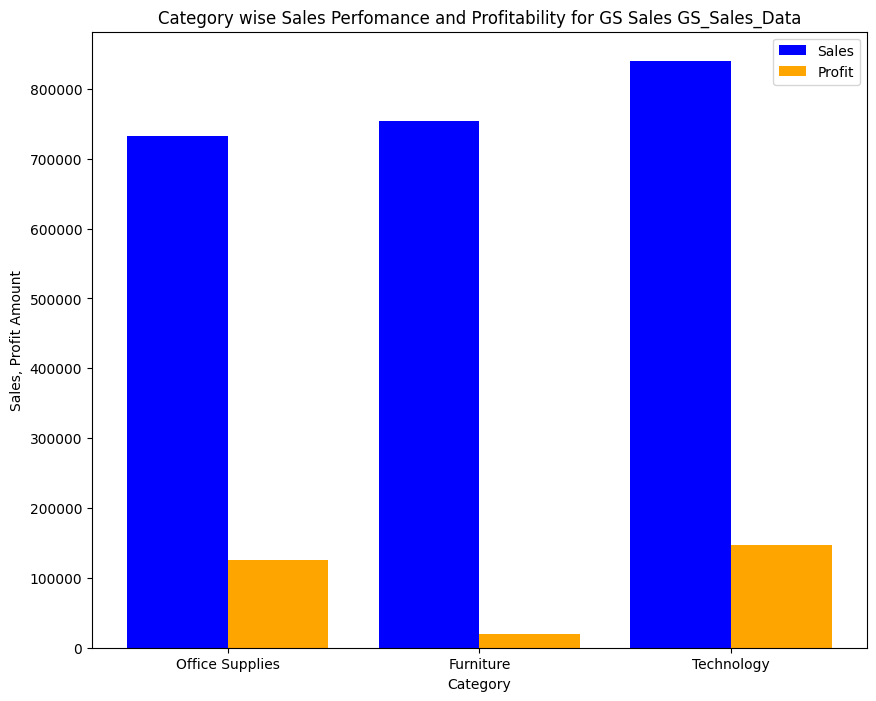

In [58]:
## Sales Perfomance across Category
Sales_Categ = GS_Sales_Data.groupBy('Category').sum('Sales')

x = Sales_Categ.toPandas()['Category'].values.tolist()
y = Sales_Categ.toPandas()['sum(Sales)'].values.tolist()

## Profitability across Category
Profit_Categ = GS_Sales_Data.groupBy('Category').sum('Profit')

x1 = Profit_Categ.toPandas()['Category'].values.tolist()
y1 = Profit_Categ.toPandas()['sum(Profit)'].values.tolist()

w = 0.4

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(10, 8))
plt.xlabel('Category')
plt.ylabel('Sales, Profit Amount')
plt.title('Category wise Sales Perfomance and Profitability for GS Sales GS_Sales_Data')
plt.xticks(bar1+w/2, x)
plt.bar(bar1, y, color='blue', width=w, label='Sales')
plt.bar(bar2, y1, color='orange', width=w, label='Profit')
plt.legend(['Sales', 'Profit'])
plt.show()

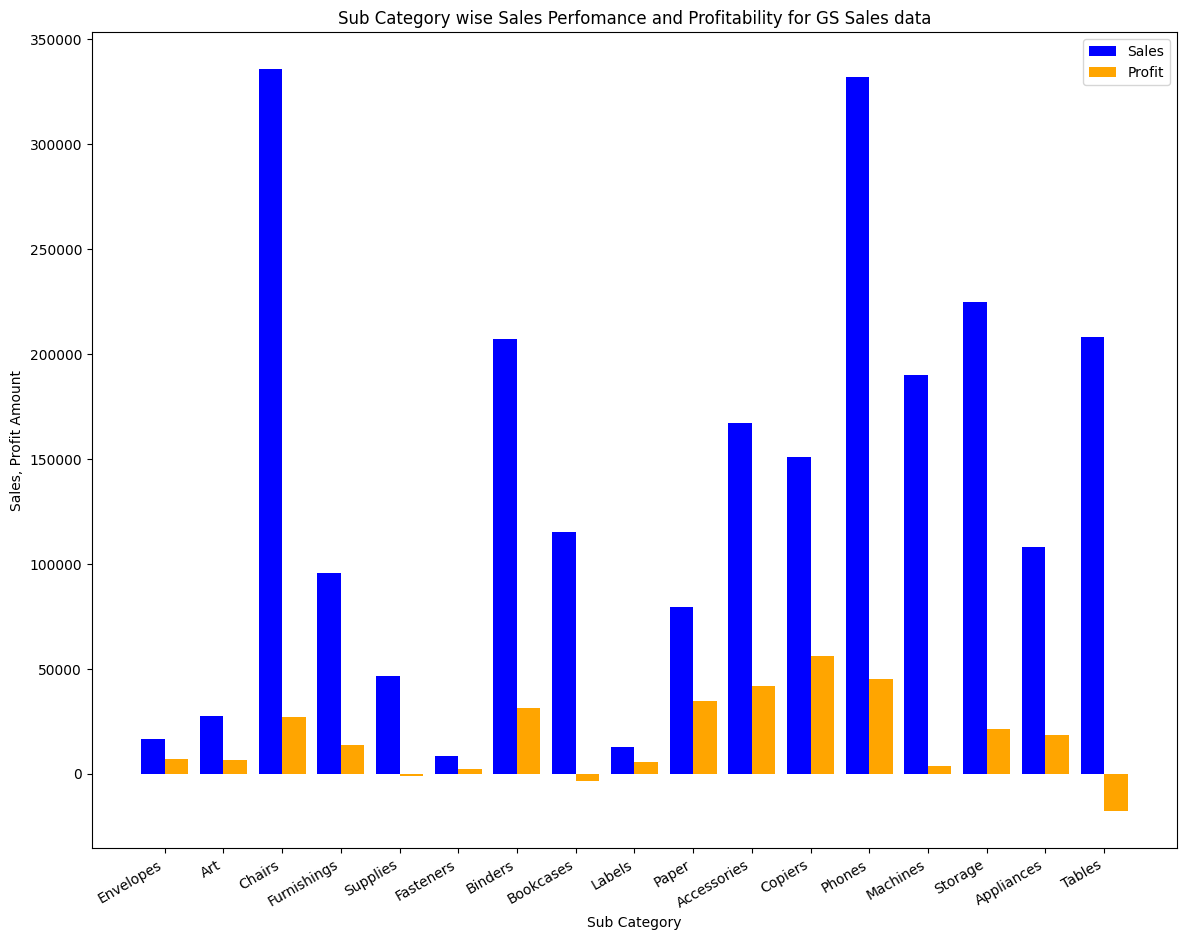

In [61]:
## Sales Perfomance across Sub Category
Sales_SubCateg = GS_Sales_Data.groupBy('Sub-Category').sum('Sales')

x = Sales_SubCateg.toPandas()['Sub-Category'].values.tolist()
y = Sales_SubCateg.toPandas()['sum(Sales)'].values.tolist()

## Profitability across Sub Category
Profit_SubCateg = GS_Sales_Data.groupBy('Sub-Category').sum('Profit')

x1 = Profit_SubCateg.toPandas()['Sub-Category'].values.tolist()
y1 = Profit_SubCateg.toPandas()['sum(Profit)'].values.tolist()

w = 0.4

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(14, 12))
plt.xlabel('Sub Category')
plt.ylabel('Sales, Profit Amount')
plt.title('Sub Category wise Sales Perfomance and Profitability for GS Sales data')
plt.xticks(bar1+w/2, x)
plt.bar(bar1, y, color='blue', width=w, label='Sales')
plt.bar(bar2, y1, color='orange', width=w, label='Profit')
plt.legend(['Sales', 'Profit'])
plt.gcf().autofmt_xdate()
plt.show()

**Geographical**

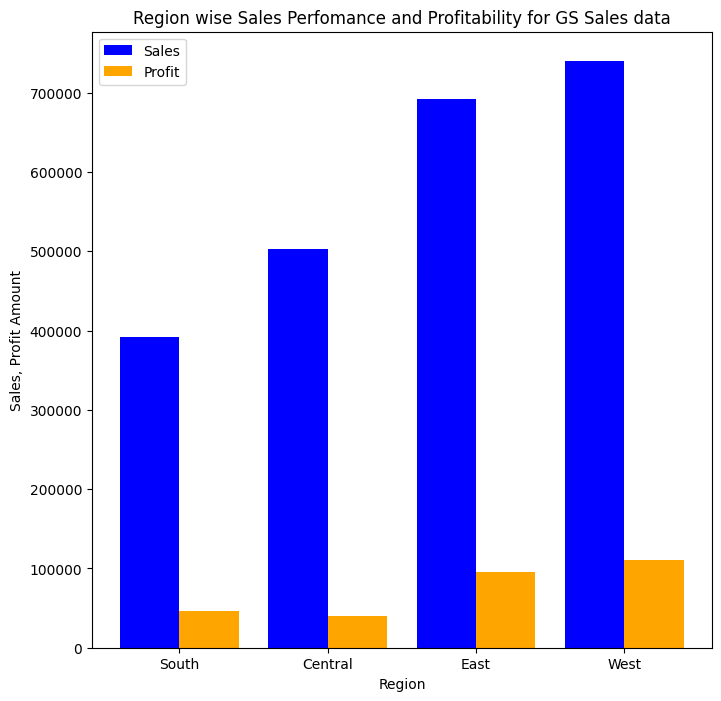

In [62]:
## Sales Perfomance across Region
Sales_Categ = GS_Sales_Data.groupBy('Region').sum('Sales')

x = Sales_Categ.toPandas()['Region'].values.tolist()
y = Sales_Categ.toPandas()['sum(Sales)'].values.tolist()

## Profitability across Region
Profit_Categ = GS_Sales_Data.groupBy('Region').sum('Profit')

x1 = Profit_Categ.toPandas()['Region'].values.tolist()
y1 = Profit_Categ.toPandas()['sum(Profit)'].values.tolist()

w = 0.4

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8, 8))
plt.xlabel('Region')
plt.ylabel('Sales, Profit Amount')
plt.title('Region wise Sales Perfomance and Profitability for GS Sales data')
plt.xticks(bar1+w/2, x)
plt.bar(bar1, y, color='blue', width=w, label='Sales')
plt.bar(bar2, y1, color='orange', width=w, label='Profit')
plt.legend(['Sales', 'Profit'])
plt.show()

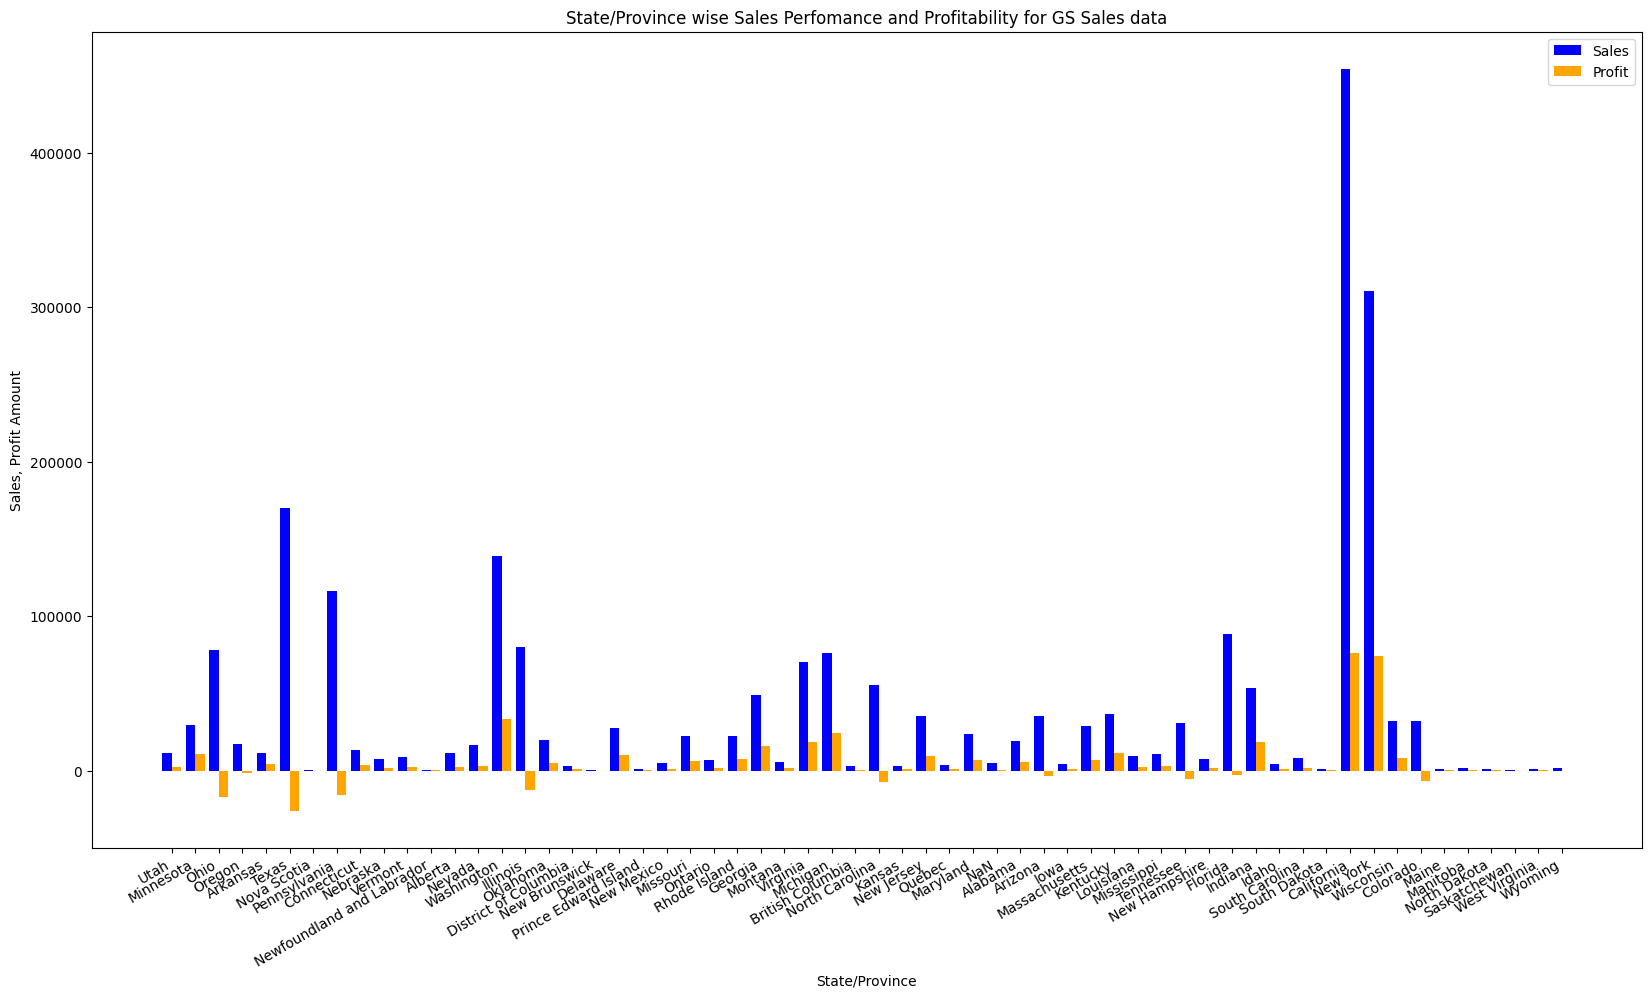

In [63]:
## Sales Perfomance across State
Sales_Categ = GS_Sales_Data.groupBy('State/Province').sum('Sales')

x = Sales_Categ.toPandas()['State/Province'].values.tolist()
y = Sales_Categ.toPandas()['sum(Sales)'].values.tolist()

## Profitability across State
Profit_Categ = GS_Sales_Data.groupBy('State/Province').sum('Profit')

x1 = Profit_Categ.toPandas()['State/Province'].values.tolist()
y1 = Profit_Categ.toPandas()['sum(Profit)'].values.tolist()

w = 0.4

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(20, 12))
plt.xlabel('State/Province')
plt.ylabel('Sales, Profit Amount')
plt.title('State/Province wise Sales Perfomance and Profitability for GS Sales data')
plt.xticks(bar1+w/2, x)
plt.bar(bar1, y, color='blue', width=w, label='Sales')
plt.bar(bar2, y1, color='orange', width=w, label='Profit')
plt.legend(['Sales', 'Profit'])
plt.gcf().autofmt_xdate()
plt.show()

**Other Visualizations**

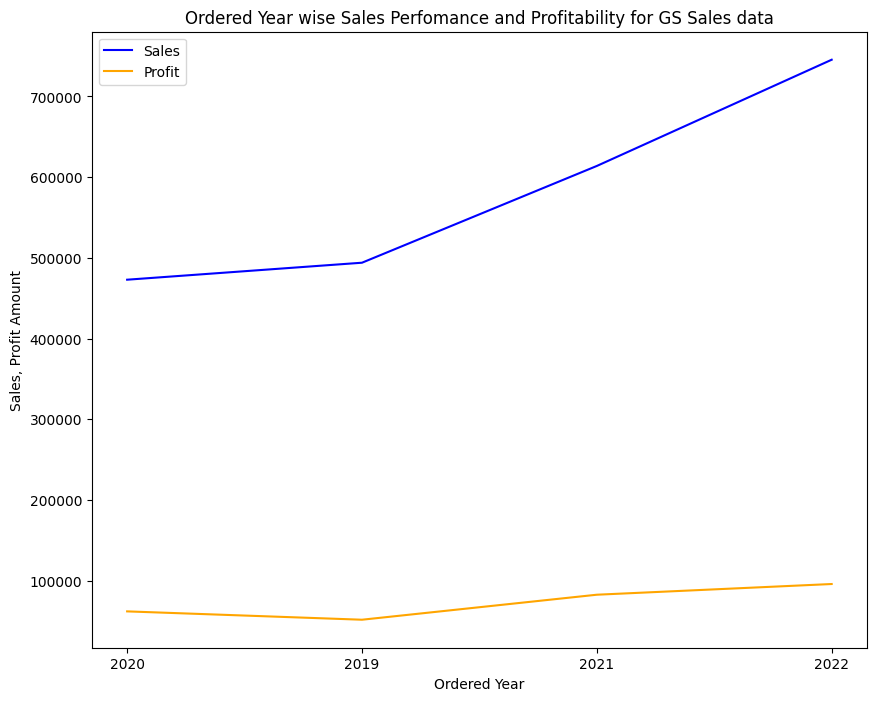

In [64]:
## Sales Perfomance across Ordered Year
Sales_Year = GS_Sales_Data.groupBy('Ordered Year').sum('Sales')

x = Sales_Year.toPandas()['Ordered Year'].values.tolist()
y = Sales_Year.toPandas()['sum(Sales)'].values.tolist()

## Profitability across Year
Profit_Year = GS_Sales_Data.groupBy('Ordered Year').sum('Profit')

x1 = Profit_Year.toPandas()['Ordered Year'].values.tolist()
y1 = Profit_Year.toPandas()['sum(Profit)'].values.tolist()

w = 0.4

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(10, 8))
plt.xlabel('Ordered Year')
plt.ylabel('Sales, Profit Amount')
plt.title('Ordered Year wise Sales Perfomance and Profitability for GS Sales data')
# plt.xticks(bar1+w/2, x)
plt.plot(x, y, color='blue', label='Sales')
plt.plot(x1, y1, color='orange', label='Profit')
plt.legend(['Sales', 'Profit'])
plt.show()

* The highest sales and greatest profit were achieved in 2022.
* The lowest sales occurred in 2020.
* The lowest profit was earned in 2019.

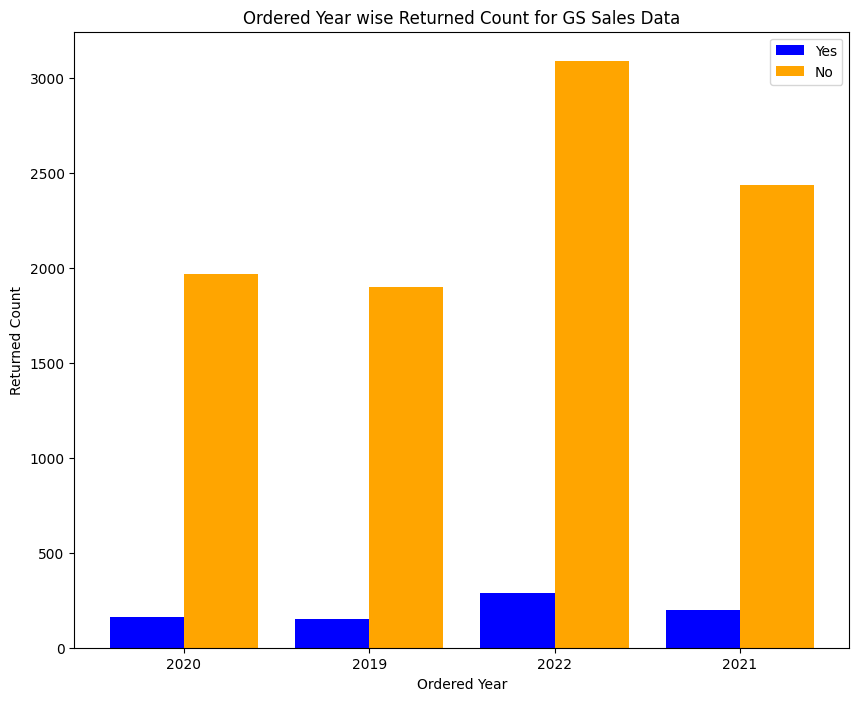

In [65]:
# Year wise Returned Details
Order_Pivot = GS_Sales_Data.groupBy('Ordered Year').pivot('Returned').count()

x = Order_Pivot.toPandas()['Ordered Year'].values.tolist()
y1 = Order_Pivot.toPandas()['No'].values.tolist()
y2 = Order_Pivot.toPandas()['Yes'].values.tolist()

w = 0.4
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(10, 8))
plt.xlabel('Ordered Year')
plt.ylabel('Returned Count')
plt.title('Ordered Year wise Returned Count for GS Sales Data')
plt.xticks(bar1+w/2, x)
plt.bar(bar1, y2, color='blue', label='Yes', width=w)
plt.bar(bar2, y1, color='orange', label='No', width=w)
plt.legend(['Yes', 'No'])
plt.show()

*   In 2022, the highest number of orders were returned, and the highest number of orders were not returned.



## **Task 04**

**predict the quantity of items to be shipped in a given future week for each segment.**

In [66]:
#load dataset
daily_target_data = spark.read.csv('/content/drive/MyDrive/SURGE GLOBAL/Daily_Target.csv', header=True, inferSchema=True)
daily_target_data.printSchema()

root
 |-- Category: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Sales Target: integer (nullable = true)



In [67]:
daily_target_data.show()

+---------------+----------+-----------+------------+
|       Category|Order Date|    Segment|Sales Target|
+---------------+----------+-----------+------------+
|Office Supplies|  1/3/2019|   Consumer|          15|
|Office Supplies|  1/4/2019|Home Office|         300|
|Office Supplies|  1/5/2019|   Consumer|          21|
|      Furniture|  1/6/2019|Home Office|        2316|
|Office Supplies|  1/6/2019|   Consumer|          17|
|Office Supplies|  1/6/2019|  Corporate|          14|
|Office Supplies|  1/6/2019|Home Office|         699|
|     Technology|  1/6/2019|Home Office|        1068|
|      Furniture|  1/7/2019|   Consumer|          81|
|Office Supplies|  1/7/2019|   Consumer|          11|
|Office Supplies|  1/9/2019|   Consumer|           9|
|     Technology|  1/9/2019|   Consumer|          29|
|      Furniture| 1/10/2019|  Corporate|          47|
|Office Supplies| 1/10/2019|  Corporate|           3|
|      Furniture| 1/11/2019|   Consumer|           9|
|      Furniture| 1/13/2019|

In [68]:
# Split the Order date
from pyspark.sql.functions import year, month, dayofweek, split

df = daily_target_data.withColumn('Year', split(daily_target_data['Order Date'], '/').getItem(2)) \
       .withColumn('Month', split(daily_target_data['Order Date'], '/').getItem(0)) \
       .withColumn('Day', split(daily_target_data['Order Date'], '/').getItem(1))
df.show(truncate=False)

+---------------+----------+-----------+------------+----+-----+---+
|Category       |Order Date|Segment    |Sales Target|Year|Month|Day|
+---------------+----------+-----------+------------+----+-----+---+
|Office Supplies|1/3/2019  |Consumer   |15          |2019|1    |3  |
|Office Supplies|1/4/2019  |Home Office|300         |2019|1    |4  |
|Office Supplies|1/5/2019  |Consumer   |21          |2019|1    |5  |
|Furniture      |1/6/2019  |Home Office|2316        |2019|1    |6  |
|Office Supplies|1/6/2019  |Consumer   |17          |2019|1    |6  |
|Office Supplies|1/6/2019  |Corporate  |14          |2019|1    |6  |
|Office Supplies|1/6/2019  |Home Office|699         |2019|1    |6  |
|Technology     |1/6/2019  |Home Office|1068        |2019|1    |6  |
|Furniture      |1/7/2019  |Consumer   |81          |2019|1    |7  |
|Office Supplies|1/7/2019  |Consumer   |11          |2019|1    |7  |
|Office Supplies|1/9/2019  |Consumer   |9           |2019|1    |9  |
|Technology     |1/9/2019  |Consum

In [69]:
df.printSchema()

root
 |-- Category: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Sales Target: integer (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)



*   Convert the "Category" and "Segment" columns into "string" data type.
*   Convert the "Year," "Month," and "Day" columns into "integer" data type.


In [70]:
# do the Cast
import pyspark.sql.types as tp

df= df.withColumn("Year",col("Year").cast(tp.IntegerType())) \
    .withColumn("Month",col("Month").cast(tp.IntegerType())) \
    .withColumn("Day",col("Day").cast(tp.IntegerType()))

df.printSchema()

root
 |-- Category: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Sales Target: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)



In [71]:
# handling categorical feature
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=['Category','Segment'],
                        outputCols=['Category_indexed','Segment_indexed'])

df = indexer.fit(df).transform(df)
df.show()

+---------------+----------+-----------+------------+----+-----+---+----------------+---------------+
|       Category|Order Date|    Segment|Sales Target|Year|Month|Day|Category_indexed|Segment_indexed|
+---------------+----------+-----------+------------+----+-----+---+----------------+---------------+
|Office Supplies|  1/3/2019|   Consumer|          15|2019|    1|  3|             0.0|            0.0|
|Office Supplies|  1/4/2019|Home Office|         300|2019|    1|  4|             0.0|            2.0|
|Office Supplies|  1/5/2019|   Consumer|          21|2019|    1|  5|             0.0|            0.0|
|      Furniture|  1/6/2019|Home Office|        2316|2019|    1|  6|             1.0|            2.0|
|Office Supplies|  1/6/2019|   Consumer|          17|2019|    1|  6|             0.0|            0.0|
|Office Supplies|  1/6/2019|  Corporate|          14|2019|    1|  6|             0.0|            1.0|
|Office Supplies|  1/6/2019|Home Office|         699|2019|    1|  6|             0

In [72]:
## Vectorized
from pyspark.ml.feature import VectorAssembler

featureAssembler = VectorAssembler(inputCols=['Year','Month','Day','Category_indexed','Segment_indexed'],
                                 outputCol='Independent Feature')

output = featureAssembler.transform(df)

output.show()

+---------------+----------+-----------+------------+----+-----+---+----------------+---------------+--------------------+
|       Category|Order Date|    Segment|Sales Target|Year|Month|Day|Category_indexed|Segment_indexed| Independent Feature|
+---------------+----------+-----------+------------+----+-----+---+----------------+---------------+--------------------+
|Office Supplies|  1/3/2019|   Consumer|          15|2019|    1|  3|             0.0|            0.0|[2019.0,1.0,3.0,0...|
|Office Supplies|  1/4/2019|Home Office|         300|2019|    1|  4|             0.0|            2.0|[2019.0,1.0,4.0,0...|
|Office Supplies|  1/5/2019|   Consumer|          21|2019|    1|  5|             0.0|            0.0|[2019.0,1.0,5.0,0...|
|      Furniture|  1/6/2019|Home Office|        2316|2019|    1|  6|             1.0|            2.0|[2019.0,1.0,6.0,1...|
|Office Supplies|  1/6/2019|   Consumer|          17|2019|    1|  6|             0.0|            0.0|[2019.0,1.0,6.0,0...|
|Office Supplies

In [73]:
# get Independent feature
output.select('Independent Feature').show()

+--------------------+
| Independent Feature|
+--------------------+
|[2019.0,1.0,3.0,0...|
|[2019.0,1.0,4.0,0...|
|[2019.0,1.0,5.0,0...|
|[2019.0,1.0,6.0,1...|
|[2019.0,1.0,6.0,0...|
|[2019.0,1.0,6.0,0...|
|[2019.0,1.0,6.0,0...|
|[2019.0,1.0,6.0,2...|
|[2019.0,1.0,7.0,1...|
|[2019.0,1.0,7.0,0...|
|[2019.0,1.0,9.0,0...|
|[2019.0,1.0,9.0,2...|
|[2019.0,1.0,10.0,...|
|[2019.0,1.0,10.0,...|
|[2019.0,1.0,11.0,...|
|[2019.0,1.0,13.0,...|
|[2019.0,1.0,13.0,...|
|[2019.0,1.0,13.0,...|
|[2019.0,1.0,13.0,...|
|[2019.0,1.0,14.0,...|
+--------------------+
only showing top 20 rows



In [74]:
# final dataset
final_data = output.select(['Independent Feature','Sales Target'])
final_data.show()

+--------------------+------------+
| Independent Feature|Sales Target|
+--------------------+------------+
|[2019.0,1.0,3.0,0...|          15|
|[2019.0,1.0,4.0,0...|         300|
|[2019.0,1.0,5.0,0...|          21|
|[2019.0,1.0,6.0,1...|        2316|
|[2019.0,1.0,6.0,0...|          17|
|[2019.0,1.0,6.0,0...|          14|
|[2019.0,1.0,6.0,0...|         699|
|[2019.0,1.0,6.0,2...|        1068|
|[2019.0,1.0,7.0,1...|          81|
|[2019.0,1.0,7.0,0...|          11|
|[2019.0,1.0,9.0,0...|           9|
|[2019.0,1.0,9.0,2...|          29|
|[2019.0,1.0,10.0,...|          47|
|[2019.0,1.0,10.0,...|           3|
|[2019.0,1.0,11.0,...|           9|
|[2019.0,1.0,13.0,...|         792|
|[2019.0,1.0,13.0,...|        1387|
|[2019.0,1.0,13.0,...|         570|
|[2019.0,1.0,13.0,...|         595|
|[2019.0,1.0,14.0,...|          66|
+--------------------+------------+
only showing top 20 rows



**Here we aim to perform continuous prediction, and the suitable machine learning algorithm for this task is regression.**

In [75]:
## Apply Linear Regression
from pyspark.ml.regression import LinearRegression

# train test split
train_data, test_data = final_data.randomSplit([0.8,0.2])

In [76]:
# call the Linear regression
regressor = LinearRegression(featuresCol='Independent Feature', labelCol='Sales Target')
regressor = regressor.fit(train_data)

In [77]:
# display the coefficients
regressor.coefficients

DenseVector([18.7538, 14.5024, 0.8391, 183.7056, -47.7764])

In [78]:
# display the intercept
regressor.intercept

-37638.70217146702

In [79]:
# do the prediction
pred = regressor.evaluate(test_data)
pred.predictions.show()

+--------------------+------------+------------------+
| Independent Feature|Sales Target|        prediction|
+--------------------+------------+------------------+
|[2019.0,1.0,6.0,0...|         699|149.16244962470228|
|[2019.0,1.0,7.0,0...|          11|245.55435398318514|
|[2019.0,1.0,13.0,...|        1387| 250.5889691220582|
|[2019.0,1.0,16.0,...|         112| 620.5175463220367|
|[2019.0,1.0,26.0,...|         124|397.42653582055937|
|[2019.0,1.0,27.0,...|          86|262.33640444609773|
|[2019.0,1.0,31.0,...|         308|449.39844935395377|
|[2019.0,2.0,3.0,0...|         106| 256.7003439894688|
|[2019.0,2.0,7.0,0...|          71|212.28035316438036|
|[2019.0,2.0,7.0,2...|         108| 579.6916227949187|
|[2019.0,2.0,11.0,...|         241| 630.8244338051736|
|[2019.0,2.0,14.0,...|         353|218.15407082640013|
|[2019.0,2.0,20.0,...|          69| 590.5999555958115|
|[2019.0,3.0,1.0,0...|          19|173.97173720670253|
|[2019.0,3.0,1.0,1...|        1247| 453.2301738573078|
|[2019.0,3

In [80]:
# performence metrics
pred.r2, pred.meanAbsoluteError, pred.meanSquaredError

(0.030632177893415324, 478.35507861337453, 1012769.3327089289)

**The predictor R2 values are significantly low because the independent variables are not correlated. To predict a continuous variable effectively, correlated independent variables are essential.**